# VIT-Vellore, SCOPE
## CSE6037 - Deep Learning and its Applications
### SUTHAR MANAN BHARATKUMAR 20MAI0016
### Assessment 4
***GitHub Link:*** https://github.com/manansuthar55/CSE6037_20MAI0016/tree/main/Assessment_4
#### Problem 2: Implement VGG16 on Multiclass image dataset.

In [16]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Dropout
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import numpy as np

In [17]:
from keras.preprocessing.image import ImageDataGenerator
imagegen = ImageDataGenerator()
train = imagegen.flow_from_directory("imagenette2/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
val = imagegen.flow_from_directory("imagenette2/val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


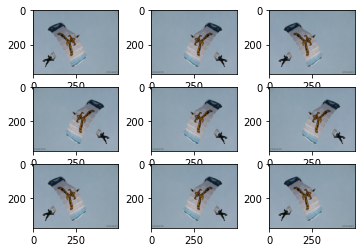

In [28]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
img = load_img('/content/imagenette2/train/n03888257/ILSVRC2012_val_00002665.JPEG')
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

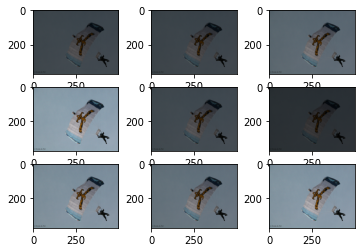

In [29]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

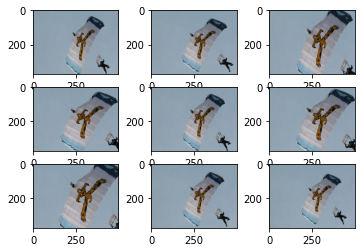

In [30]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

In [18]:
train_target = keras.utils.to_categorical(train.labels)
val_target = keras.utils.to_categorical(val.labels)

## VGG 16 Architecture

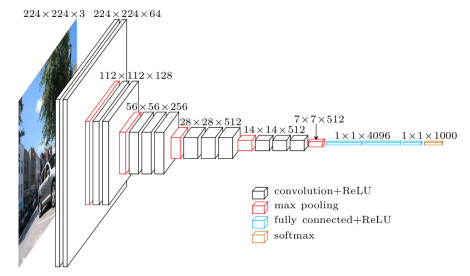

In [19]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)      

In [21]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(train, train_target, epochs=10, batch_size=128, validation_data=(val, val_target))

Epoch 1/10
74/74 [==============================] - 2s 16ms/step - loss: 0.6691 - accuracy: 0.8102 - val_loss: 0.2105 - val_accuracy: 0.9353
Epoch 2/10
74/74 [==============================] - 1s 14ms/step - loss: 0.1787 - accuracy: 0.9508 - val_loss: 0.1842 - val_accuracy: 0.9396
Epoch 3/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0932 - accuracy: 0.9769 - val_loss: 0.1806 - val_accuracy: 0.9401
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0706 - accuracy: 0.9815 - val_loss: 0.1863 - val_accuracy: 0.9419
Epoch 5/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0522 - accuracy: 0.9866 - val_loss: 0.1771 - val_accuracy: 0.9434
Epoch 6/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0381 - accuracy: 0.9902 - val_loss: 0.1724 - val_accuracy: 0.9465
Epoch 7/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.1771 - val_accuracy: 0.9475
Epoch 8/10
74